In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from utils.vino_functions import PrepareNetWork,PrepareInputImage,MakePrediction
from pathlib import Path
import time
import tensorflow as tf 

### Global variables and model paths

In [2]:
# Model paths
model_root = Path('model/intel')
eng_dect_bin = model_root / 'text-detection-0004/FP16/text-detection-0004.bin'
eng_dect_xml = model_root / 'text-detection-0004/FP16/text-detection-0004.xml'

eng_rec_bin = model_root / 'text-recognition-0014/FP16/text-recognition-0014.bin'
eng_rec_xml = model_root / 'text-recognition-0014/FP16/text-recognition-0014.xml'

# Intel hardwares
device1 = 'CPU'
device2 = 'GPU'

# classes for english recognition
classes = list('#0123456789abcdefghijklmnopqrstuvwxyz')

#### Prepare Networks 

In [3]:
eng_dect_names, eng_dect_exec_net, eng_dect_img_shape = PrepareNetWork(eng_dect_xml,eng_dect_bin,device1)
eng_rec_names, eng_rec_exec_net, eng_rec_img_shape = PrepareNetWork(eng_rec_xml,eng_rec_bin,device1)

Extract Model Input Dimension: 1 3 768 1280
Extract Model Input Dimension: 1 1 32 128


### Sample Image

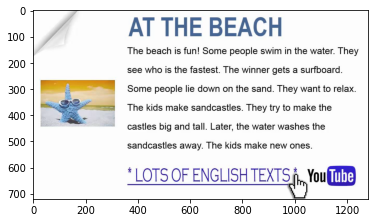

In [4]:
eng_text = cv2.imread('data/eng_text.jpg')
plt.imshow(eng_text)
plt.show()

#### Run Inference and detect texts

In [5]:
# EngText Detection
_, in_frame = PrepareInputImage(eng_text, eng_dect_img_shape)
logit_output = MakePrediction(eng_dect_exec_net, eng_dect_names[0], in_frame)
eng_loc_pred = logit_output['model/segm_logits/add'] # the output name that we need
eng_loc_pred.shape

(1, 2, 192, 320)

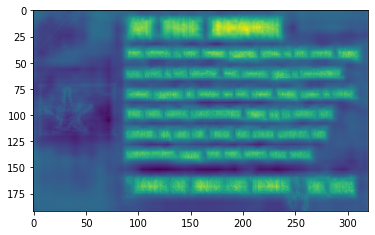

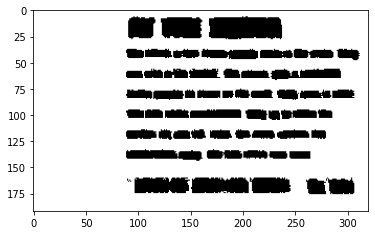

In [6]:
# Show the prediction of where the eng texts are at in the image
eng_loc_pred = eng_loc_pred[0][1] # get the first output (you can do eng_loc_pred[0][0] as well does not matter in our case)
plt.imshow(eng_loc_pred)
plt.show()

# Binarize the image to white and black for drawing bounding boxes
thresh = np.average(eng_loc_pred)-np.median(eng_loc_pred)
_, binary_eng_loc_pred = cv2.threshold(eng_loc_pred,thresh,255,cv2.THRESH_BINARY_INV)
plt.imshow(binary_eng_loc_pred,cmap='gray')
plt.show()

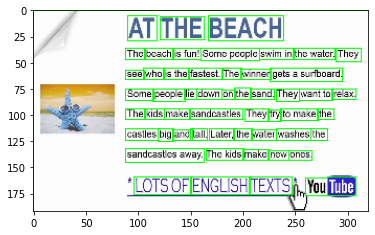

In [7]:
# Resize the original image to the output size 
adj_eng_text = cv2.resize(eng_text,(320,192))
texts = []


# Draw bounding boxes with countours
contours, _ = cv2.findContours(binary_eng_loc_pred.astype(np.uint8), 
                               mode = cv2.RETR_TREE,
                               method = cv2.CHAIN_APPROX_SIMPLE)
for c in contours:
    rect = cv2.boundingRect(c)
    
    x,y,w,h = rect
    
    if w * h > 50:
        box = adj_eng_text[y:y+h,x:x+w]
        texts.append(box)
        cv2.rectangle(adj_eng_text,(x,y),(x+w,y+h),(0,255,0),1)
        
plt.imshow(adj_eng_text)

In [8]:
for text_img in texts[1:]:
    box = cv2.cvtColor(text_img,cv2.COLOR_BGR2GRAY)
#     print(box.shape)
    _, in_frame = PrepareInputImage(box, eng_rec_img_shape)
    result = MakePrediction(eng_rec_exec_net, eng_rec_names[0], in_frame)
    text_logits = result['logits']
#     print(text_logits.shape)
    
    # CTC-Greedy Decoder
    decoded, neg_sum_logits = tf.nn.ctc_greedy_decoder(text_logits,[text_logits.shape[0]])
    
    alphabets = []
    for idx in decoded[0].values:
        if idx == 0:
            alphabets.append('')
        else:
            alphabets.append(classes[idx])
            
    print("".join(alphabets))
    

you
tube
texts
english
lotsof
onos
nw
makc
thokids
sandatorway
mater
and
the
washes
une
laler
tall
big
casiles
ir
te
tormaxe
they
sandcastles
maxe
kids
the
on
raax
nantio
they
sand
down
lie
peope
some
the
497
minner
getseasurboard
tha
fastest
sihe
who
thoy
thowater
swimfin
somasopic
siun
beach
thc
the
beach
at


## 

### Other Language

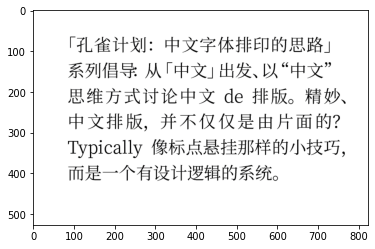

In [9]:
other_text = cv2.imread('data/chi_text.png')
plt.imshow(other_text)
plt.show()

In [10]:
_, in_frame = PrepareInputImage(other_text, eng_dect_img_shape)
logit_output = MakePrediction(eng_dect_exec_net, eng_dect_names[0], in_frame)
other_loc_pred = logit_output['model/segm_logits/add'] # the output name that we need
other_loc_pred.shape

(1, 2, 192, 320)

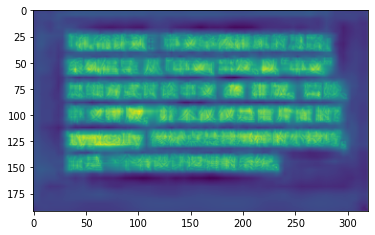

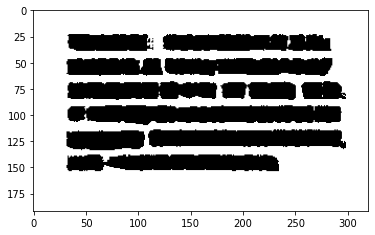

In [11]:
# Show the prediction of where the eng texts are at in the image
other_loc_pred = other_loc_pred[0][1] # get the first output (you can do eng_loc_pred[0][0] as well does not matter in our case)
plt.imshow(other_loc_pred)
plt.show()

# Binarize the image to white and black for drawing bounding boxes
thresh = np.average(eng_loc_pred)-np.median(eng_loc_pred)
_, binary_other_loc_pred = cv2.threshold(other_loc_pred,thresh,255,cv2.THRESH_BINARY_INV)
plt.imshow(binary_other_loc_pred,cmap='gray')
plt.show()

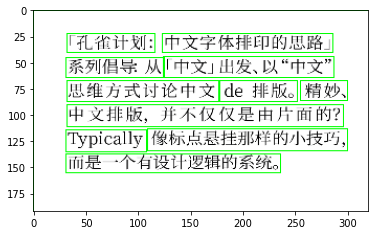

In [12]:
# Resize the original image to the output size 
adj_other_text = cv2.resize(other_text,(320,192))
texts = []


# Draw bounding boxes with countours
contours, _ = cv2.findContours(binary_other_loc_pred.astype(np.uint8), 
                               mode = cv2.RETR_TREE,
                               method = cv2.CHAIN_APPROX_SIMPLE)
for c in contours:
    rect = cv2.boundingRect(c)
    
    x,y,w,h = rect
    
    if w * h > 50:
        box = adj_other_text[y:y+h,x:x+w]
        texts.append(box)
        cv2.rectangle(adj_other_text,(x,y),(x+w,y+h),(0,255,0),1)
        
plt.imshow(adj_other_text)